In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import geobr
from shapely.wkt import loads as load_wkt
from shapely.geometry import Point

%matplotlib inline

In [2]:
#Dados
df = pd.read_excel('tabela1378_2.xlsx', skiprows=5, index_col='Unnamed: 0')
shape_muni = geobr.read_municipality(code_muni='all', year=2010, simplified=True, verbose=False)


In [3]:
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Total,Homens,Mulheres
1100015,Alta Floresta D'Oeste (RO),Total,Total,24392.0,12656.0,11736.0
NaN,NaN,60 a 69 anos,Total,1227.0,652.0,575.0
NaN,NaN,70 anos ou mais,Total,860.0,491.0,369.0
1100023,Ariquemes (RO),Total,Total,90353.0,45543.0,44810.0
NaN,NaN,60 a 69 anos,Total,3674.0,1898.0,1776.0
...,...,...,...,...,...,...
NaN,NaN,70 anos ou mais,Total,209.0,112.0,97.0
5300108,Brasília (DF),Total,Total,2570160.0,1228880.0,1341280.0
NaN,NaN,60 a 69 anos,Total,118042.0,52049.0,65993.0
NaN,NaN,70 anos ou mais,Total,79571.0,32933.0,46638.0


In [4]:
#Verificando se há diferenças nos dados da Tabela do Sidra e dos dados oferecidos pelo geobr
teste1 = [float(x) for x in df.dropna().index.values]
teste2 = shape_muni['code_muni'].values
diferencas = []

for item in teste2:
    if item not in teste1:
        diferencas.append(item)
diferencas

[4300001.0, 4300002.0]

In [5]:
shape_muni[shape_muni['name_muni'] == 'Lagoa Dos Patos']

,code_muni,name_muni,code_state,abbrev_state,geometry
2669,3137304.0,Lagoa Dos Patos,31,MG,"MULTIPOLYGON (((-44.51250 -16.94176, -44.50472..."
4604,4300002.0,Lagoa Dos Patos,43,RS,"MULTIPOLYGON (((-52.08379 -32.18861, -52.08731..."


In [6]:
shape_muni[shape_muni['name_muni'] == 'Lagoa Mirim']

,code_muni,name_muni,code_state,abbrev_state,geometry
4603,4300001.0,Lagoa Mirim,43,RS,"MULTIPOLYGON (((-52.62242 -32.14398, -52.62241..."


In [7]:
#Havia uma diferença de duas linhas entre a Tabela e os dados do geobr. O problema foi que na base do geobr temos duas
#"Lagoa dos patos" e uma delas (a do Rio Grande do Sul) não aparece na Tabela do Sidra de 2010. Além disso, o outro suposto
#município, Lagoa Mirim, também não aparece. Então para não haver erro de atribuição de código no merge vou descartar
#os dois.

#Eu dei uma pesquisada acerca desses supostos municípios. O geobr considerou os dois como municípios mais ao que parece
#são literalmente lagos do extremo sul do Rio Grande do Sul, fazendo fronteira com o Uruguai. 
excluidos = [x for x in shape_muni.index if (x == 4603 or x == 4604)]
shape_muni = shape_muni.drop(excluidos)
shape_muni = shape_muni.reset_index(drop=True)
shape_muni

,code_muni,name_muni,code_state,abbrev_state,geometry
0,1100015.0,Alta Floresta D'oeste,11,RO,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151..."
1,1100023.0,Ariquemes,11,RO,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ..."
2,1100031.0,Cabixi,11,RO,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161..."
3,1100049.0,Cacoal,11,RO,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900..."
4,1100056.0,Cerejeiras,11,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603..."
...,...,...,...,...,...
5560,5222005.0,Vianópolis,52,GO,"POLYGON ((-48.54164 -16.74126, -48.53274 -16.7..."
5561,5222054.0,Vicentinópolis,52,GO,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6..."
5562,5222203.0,Vila Boa,52,GO,"POLYGON ((-46.97635 -14.93112, -46.94801 -15.0..."
5563,5222302.0,Vila Propício,52,GO,"POLYGON ((-48.86700 -15.09735, -48.86191 -15.0..."


In [8]:
#Verificando novamente
teste1 = [float(x) for x in df.dropna().index.values]
teste2 = shape_muni['code_muni'].values
diferencas = []
for item in teste2:
    if item not in teste1:
        diferencas.append(item)
diferencas

[]

In [9]:
indices = [float(x) for x in df.dropna().index.values]
municipios = [df['Unnamed: 1'][i] for i in range(0, len(df)-1, 3)]
total = [df['Total'][i] for i in range(0, len(df)-1, 3)]
homens = [df['Homens'][i] for i in range(0, len(df)-1, 3)]
mulheres = [df['Mulheres'][i] for i in range(0, len(df)-1, 3)]
total_idosos = [df.iloc[i+1]['Total'] + df.iloc[i+2]['Total'] for i in range(0, len(df)-2, 3)]
homens_idosos = [df.iloc[i+1]['Homens'] + df.iloc[i+2]['Homens'] for i in range(0, len(df)-2, 3)]
mulheres_idosas = [df.iloc[i+1]['Mulheres'] + df.iloc[i+2]['Mulheres'] for i in range(0, len(df)-2, 3)]

In [10]:
for x in range(3):
    print(municipios[x], total[x], homens[x], mulheres[x], mulheres_idosas[x], homens_idosos[x], total_idosos[x])

Alta Floresta D'Oeste (RO) 24392.0 12656.0 11736.0 944.0 1143.0 2087.0
Ariquemes (RO) 90353.0 45543.0 44810.0 2884.0 3210.0 6094.0
Cabixi (RO) 6313.0 3266.0 3047.0 287.0 359.0 646.0


In [11]:
def teste(arr1, arr2):
    for i in range(len(municipios)):
        if(arr1[i] != arr2[i]): return("Inconsistência")
    return "Passou"

#Testando array de municipios
print(teste(municipios, df.dropna()['Unnamed: 1'].values))


Passou


In [12]:
data = []
for i in range(len(indices)):
    data.append([indices[i], municipios[i], homens[i], mulheres[i], homens_idosos[i], mulheres_idosas[i], total_idosos[i], total[i]])
data

[[1100015.0,
  "Alta Floresta D'Oeste (RO)",
  12656.0,
  11736.0,
  1143.0,
  944.0,
  2087.0,
  24392.0],
 [1100023.0,
  'Ariquemes (RO)',
  45543.0,
  44810.0,
  3210.0,
  2884.0,
  6094.0,
  90353.0],
 [1100031.0, 'Cabixi (RO)', 3266.0, 3047.0, 359.0, 287.0, 646.0, 6313.0],
 [1100049.0, 'Cacoal (RO)', 39124.0, 39450.0, 3255.0, 3221.0, 6476.0, 78574.0],
 [1100056.0, 'Cerejeiras (RO)', 8551.0, 8478.0, 869.0, 812.0, 1681.0, 17029.0],
 [1100064.0,
  'Colorado do Oeste (RO)',
  9330.0,
  9261.0,
  1067.0,
  973.0,
  2040.0,
  18591.0],
 [1100072.0, 'Corumbiara (RO)', 4711.0, 4072.0, 402.0, 327.0, 729.0, 8783.0],
 [1100080.0,
  'Costa Marques (RO)',
  7202.0,
  6476.0,
  495.0,
  348.0,
  843.0,
  13678.0],
 [1100098.0,
  "Espigão D'Oeste (RO)",
  14606.0,
  14123.0,
  1187.0,
  1108.0,
  2295.0,
  28729.0],
 [1100106.0,
  'Guajará-Mirim (RO)',
  20947.0,
  20709.0,
  1547.0,
  1535.0,
  3082.0,
  41656.0],
 [1100114.0, 'Jaru (RO)', 26005.0, 26000.0, 2171.0, 2081.0, 4252.0, 52005.0],
 [1

In [13]:
new_df = pd.DataFrame(data, columns=['Código', 'Municípios', 'Homens', 'Mulheres', 'H_Idosos', 'M_Idosas', 'Total_Idosos', 'Total'])
new_df

,Código,Municípios,Homens,Mulheres,H_Idosos,M_Idosas,Total_Idosos,Total
0,1100015.0,Alta Floresta D'Oeste (RO),12656.0,11736.0,1143.0,944.0,2087.0,24392.0
1,1100023.0,Ariquemes (RO),45543.0,44810.0,3210.0,2884.0,6094.0,90353.0
2,1100031.0,Cabixi (RO),3266.0,3047.0,359.0,287.0,646.0,6313.0
3,1100049.0,Cacoal (RO),39124.0,39450.0,3255.0,3221.0,6476.0,78574.0
4,1100056.0,Cerejeiras (RO),8551.0,8478.0,869.0,812.0,1681.0,17029.0
...,...,...,...,...,...,...,...,...
5560,5222005.0,Vianópolis (GO),6297.0,6251.0,638.0,690.0,1328.0,12548.0
5561,5222054.0,Vicentinópolis (GO),3873.0,3498.0,321.0,266.0,587.0,7371.0
5562,5222203.0,Vila Boa (GO),2588.0,2147.0,171.0,121.0,292.0,4735.0
5563,5222302.0,Vila Propício (GO),2689.0,2456.0,325.0,251.0,576.0,5145.0


In [14]:
join_df = pd.merge(new_df, shape_muni, left_on='Código', right_on='code_muni', how='left')
columns = ['Código', 'Municípios', 'Homens', 'Mulheres', 'H_Idosos', 'M_Idosas', 'Total_Idosos', 'Total', 'geometry']
join_df = join_df[columns]
join_df.head()

,Código,Municípios,Homens,Mulheres,H_Idosos,M_Idosas,Total_Idosos,Total,geometry
0,1100015.0,Alta Floresta D'Oeste (RO),12656.0,11736.0,1143.0,944.0,2087.0,24392.0,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151..."
1,1100023.0,Ariquemes (RO),45543.0,44810.0,3210.0,2884.0,6094.0,90353.0,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ..."
2,1100031.0,Cabixi (RO),3266.0,3047.0,359.0,287.0,646.0,6313.0,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161..."
3,1100049.0,Cacoal (RO),39124.0,39450.0,3255.0,3221.0,6476.0,78574.0,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900..."
4,1100056.0,Cerejeiras (RO),8551.0,8478.0,869.0,812.0,1681.0,17029.0,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603..."


In [15]:
copy = join_df

In [16]:
razao_h = join_df.groupby(['Municípios'], sort=False).apply(lambda x: 100*(x['H_Idosos']/x['Homens']))
razao_m = join_df.groupby(['Municípios'], sort=False).apply(lambda x: 100*(x['M_Idosas']/x['Mulheres']))
razao_genero = join_df.groupby(['Municípios'], sort=False).apply(lambda x: (x['M_Idosas']/x['H_Idosos']))

In [17]:
copy['idosos_h/total_h'] = razao_h.values
copy['idosas_m/total_m'] = razao_m.values
copy['idosas_m/idosos_h'] = razao_genero.values
copy

,Código,Municípios,Homens,Mulheres,H_Idosos,M_Idosas,Total_Idosos,Total,geometry,idosos_h/total_h,idosas_m/total_m,idosas_m/idosos_h
0,1100015.0,Alta Floresta D'Oeste (RO),12656.0,11736.0,1143.0,944.0,2087.0,24392.0,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151...",9.031290,8.043626,0.825897
1,1100023.0,Ariquemes (RO),45543.0,44810.0,3210.0,2884.0,6094.0,90353.0,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ...",7.048284,6.436063,0.898442
2,1100031.0,Cabixi (RO),3266.0,3047.0,359.0,287.0,646.0,6313.0,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161...",10.992039,9.419101,0.799443
3,1100049.0,Cacoal (RO),39124.0,39450.0,3255.0,3221.0,6476.0,78574.0,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900...",8.319701,8.164766,0.989555
4,1100056.0,Cerejeiras (RO),8551.0,8478.0,869.0,812.0,1681.0,17029.0,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...",10.162554,9.577731,0.934407
...,...,...,...,...,...,...,...,...,...,...,...,...
5560,5222005.0,Vianópolis (GO),6297.0,6251.0,638.0,690.0,1328.0,12548.0,"POLYGON ((-48.54164 -16.74126, -48.53274 -16.7...",10.131809,11.038234,1.081505
5561,5222054.0,Vicentinópolis (GO),3873.0,3498.0,321.0,266.0,587.0,7371.0,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...",8.288149,7.604345,0.828660
5562,5222203.0,Vila Boa (GO),2588.0,2147.0,171.0,121.0,292.0,4735.0,"POLYGON ((-46.97635 -14.93112, -46.94801 -15.0...",6.607419,5.635771,0.707602
5563,5222302.0,Vila Propício (GO),2689.0,2456.0,325.0,251.0,576.0,5145.0,"POLYGON ((-48.86700 -15.09735, -48.86191 -15.0...",12.086277,10.219870,0.772308


In [18]:
#Fazendo o typecasting para GeoDataFrame
join_df = gpd.GeoDataFrame(join_df)
copy = gpd.GeoDataFrame(copy)
copy

,Código,Municípios,Homens,Mulheres,H_Idosos,M_Idosas,Total_Idosos,Total,geometry,idosos_h/total_h,idosas_m/total_m,idosas_m/idosos_h
0,1100015.0,Alta Floresta D'Oeste (RO),12656.0,11736.0,1143.0,944.0,2087.0,24392.0,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151...",9.031290,8.043626,0.825897
1,1100023.0,Ariquemes (RO),45543.0,44810.0,3210.0,2884.0,6094.0,90353.0,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ...",7.048284,6.436063,0.898442
2,1100031.0,Cabixi (RO),3266.0,3047.0,359.0,287.0,646.0,6313.0,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161...",10.992039,9.419101,0.799443
3,1100049.0,Cacoal (RO),39124.0,39450.0,3255.0,3221.0,6476.0,78574.0,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900...",8.319701,8.164766,0.989555
4,1100056.0,Cerejeiras (RO),8551.0,8478.0,869.0,812.0,1681.0,17029.0,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...",10.162554,9.577731,0.934407
...,...,...,...,...,...,...,...,...,...,...,...,...
5560,5222005.0,Vianópolis (GO),6297.0,6251.0,638.0,690.0,1328.0,12548.0,"POLYGON ((-48.54164 -16.74126, -48.53274 -16.7...",10.131809,11.038234,1.081505
5561,5222054.0,Vicentinópolis (GO),3873.0,3498.0,321.0,266.0,587.0,7371.0,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...",8.288149,7.604345,0.828660
5562,5222203.0,Vila Boa (GO),2588.0,2147.0,171.0,121.0,292.0,4735.0,"POLYGON ((-46.97635 -14.93112, -46.94801 -15.0...",6.607419,5.635771,0.707602
5563,5222302.0,Vila Propício (GO),2689.0,2456.0,325.0,251.0,576.0,5145.0,"POLYGON ((-48.86700 -15.09735, -48.86191 -15.0...",12.086277,10.219870,0.772308


In [19]:
df_estados = geobr.read_state(code_state='all', year=2018)

In [20]:
centroides_estado = []
for linha in df_estados.itertuples():
    poligono = load_wkt(str(linha.geometry))
    centroides_estado.append(poligono.centroid)
    
coordenadas_estado = []
for point in centroides_estado:
    coordenadas_estado.append((point.x, point.y))
    
df_estados['centroides'] = coordenadas_estado

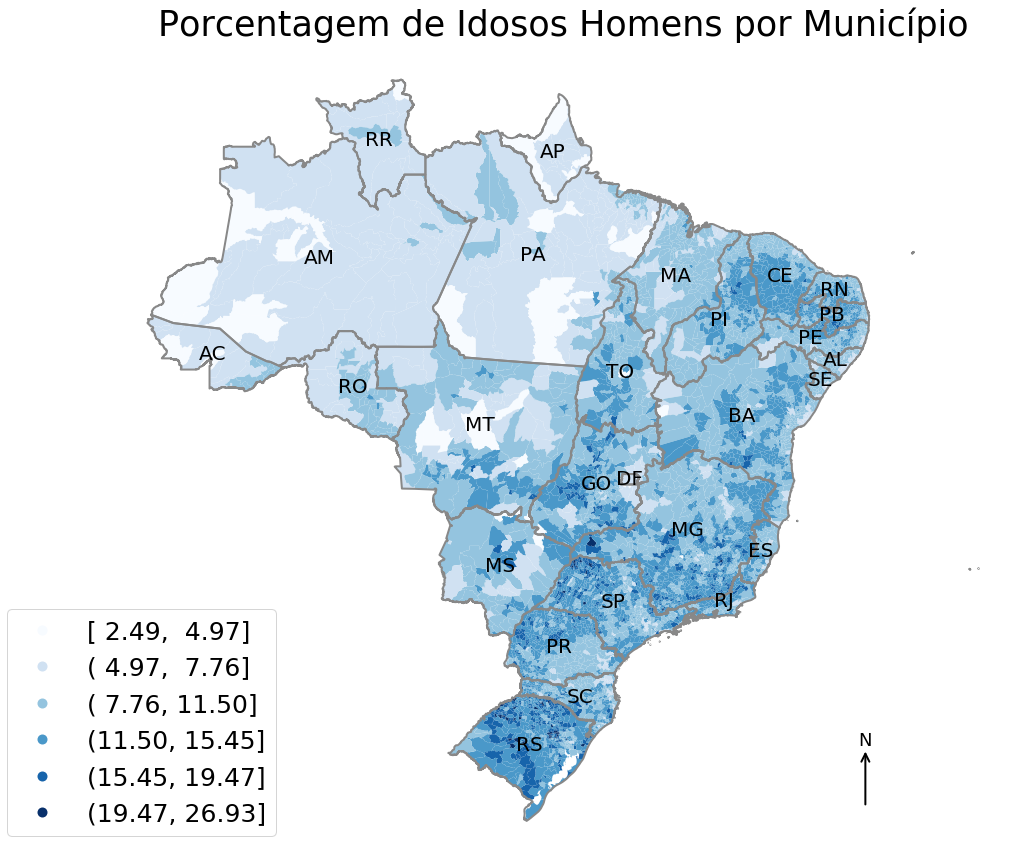

In [21]:
plt.rcParams['legend.fontsize'] = 25
fig_h, ax_h = plt.subplots(figsize=(20, 15))
copy.plot(column='idosos_h/total_h', cmap='Blues', scheme='percentiles', k=5, legend=True, ax=ax_h)

ax_h.annotate('', xy=(-35, -30), xytext=(-35, -33), arrowprops=dict(arrowstyle= '->', color='k', lw=2, mutation_scale=20))
ax_h.text(-35, -30, "N", ha="center", va="bottom", size=18)
df_estados.geometry.boundary.plot(color=None,edgecolor='#888888',linewidth = 2,ax=ax_h)

for linha in df_estados.itertuples():
    ax_h.annotate(s=linha.abbrev_state, xy=linha.centroides, horizontalalignment='center', verticalalignment='center', fontsize=20)

ax_h.set_title("Porcentagem de Idosos Homens por Município", fontdict={'fontsize':35})
ax_h.axis('off')
ax_h.get_legend().set_bbox_to_anchor((.2,.32))

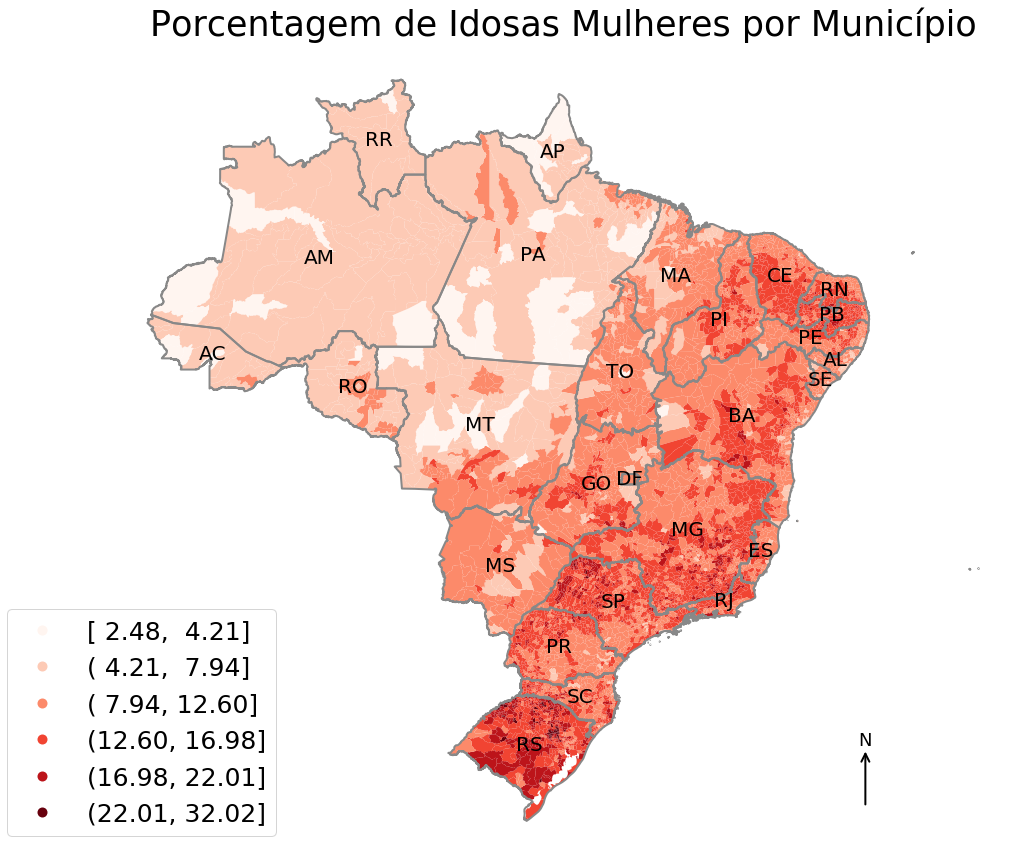

In [22]:
fig_m, ax_m = plt.subplots(figsize=(20, 15))
copy.plot(column='idosas_m/total_m', cmap='Reds', scheme='percentiles', k=5, legend=True, ax=ax_m)

ax_m.annotate('', xy=(-35, -30), xytext=(-35, -33), arrowprops=dict(arrowstyle= '->', color='k', lw=2, mutation_scale=20))
ax_m.text(-35, -30, "N", ha="center", va="bottom", size=18)
df_estados.geometry.boundary.plot(color=None,edgecolor='#888888',linewidth = 2,ax=ax_m)

for linha in df_estados.itertuples():
    ax_m.annotate(s=linha.abbrev_state, xy=linha.centroides, horizontalalignment='center', verticalalignment='center', fontsize=20)

ax_m.set_title("Porcentagem de Idosas Mulheres por Município", fontdict={'fontsize':35})
ax_m.axis('off')
ax_m.get_legend().set_bbox_to_anchor((.2,.32))

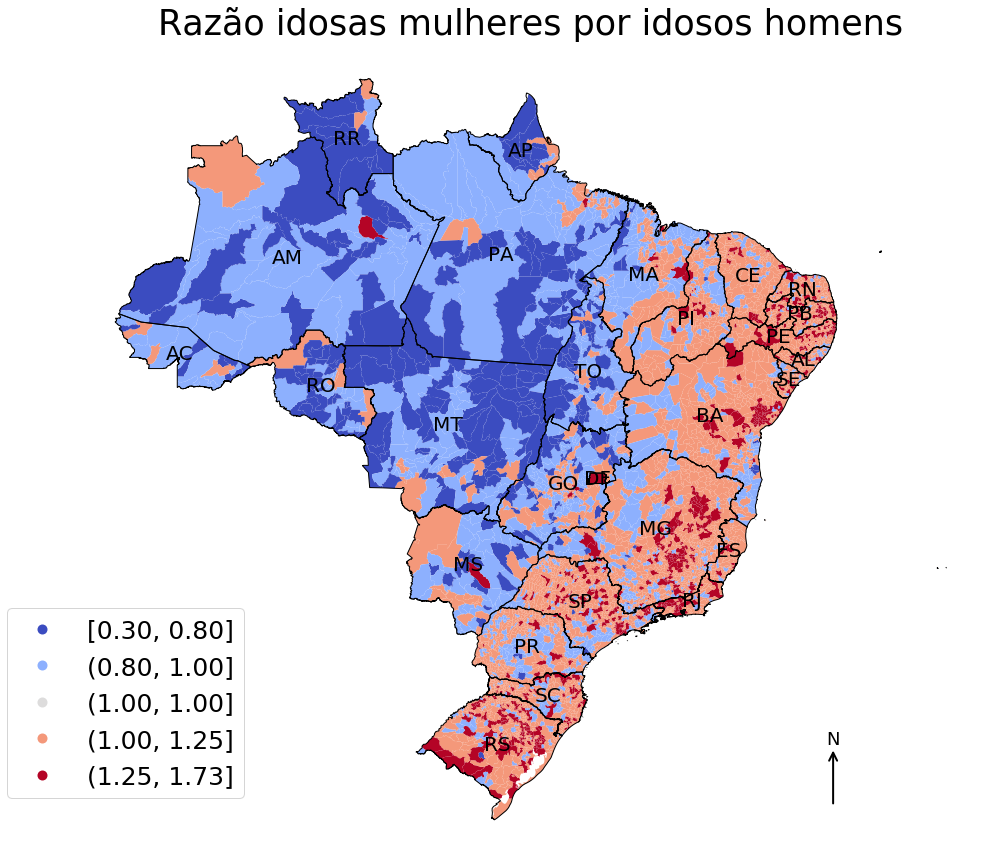

In [23]:
fig_gen, ax_gen = plt.subplots(figsize=(20, 15))
copy.plot(column='idosas_m/idosos_h', cmap='coolwarm', scheme='userdefined', classification_kwds={"bins": [0.8, 1, 1, 1.25]}, legend=True, ax=ax_gen)

ax_gen.annotate('', xy=(-35, -30), xytext=(-35, -33), arrowprops=dict(arrowstyle= '->', color='k', lw=2, mutation_scale=20))
ax_gen.text(-35, -30, "N", ha="center", va="bottom", size=18)
df_estados.geometry.boundary.plot(color=None,edgecolor='#000000',linewidth = 1,ax=ax_gen)

for linha in df_estados.itertuples():
    ax_gen.annotate(s=linha.abbrev_state, xy=linha.centroides, horizontalalignment='center', verticalalignment='center', fontsize=20)


ax_gen.set_title("Razão idosas mulheres por idosos homens", fontdict={'fontsize':35})
ax_gen.axis('off')
ax_gen.get_legend().set_bbox_to_anchor((.2,.32))

In [24]:
fig_h.savefig('/home/marchesotti/Downloads/porcentagem_idosos_homens.png')
fig_m.savefig('/home/marchesotti/Downloads/porcentagem_idosas_mulheres.png')
fig_gen.savefig('/home/marchesotti/Downloads/razao_idosas_idosos.png')